In [211]:
import pandas as pd

# Carrega o dataset
df = pd.read_csv("/content/drive/MyDrive/Fatec/03 Semestre/Projeto Integrador/data.csv", encoding="latin-1")

# Exibe o total de linhas
print(f"Total de registros: {df.shape[0]}")

# Exibe as primeiras linhas
df.head()

Total de registros: 541909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [212]:
# Exibe informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [213]:
# Verifica valores ausentes em cada coluna
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [215]:
# Análise de estatísticas básicas
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [216]:
# Calcula o IQR
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define os limites superior e inferior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtra os outliers
df_so = df[(df['Quantity'] >= lower_limit) & (df['Quantity'] <= upper_limit)]

In [217]:
# Remove duplicatas exatas
df_so = df_so.drop_duplicates()

In [218]:
# Converte InvoiceDate para formato de data e CustomerID para string
df_so["InvoiceDate"] = pd.to_datetime(df_so["InvoiceDate"])
df_so["CustomerID"] = df_so["CustomerID"].astype("Int64").astype(str)

In [219]:
# Cria coluna de total gasto por item (Quantidade * Preço Unitário)
df_so["TotalPrice"] = df_so["Quantity"] * df_so["UnitPrice"]

# Cria uma nova coluna com o mês e ano da compra
df_so["YearMonth"] = df_so["InvoiceDate"].dt.to_period("M")

In [220]:
# Verifica se os valores nulos foram removidos
df_so.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,802
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
YearMonth,0


In [221]:
# Verificando se a coluna InvoiceDate foi convertida para data
df_so.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object
TotalPrice,float64
YearMonth,period[M]


In [222]:
# Análise de estatísticas básicas após o tratamento
df_so.describe()

,Quantity,InvoiceDate,UnitPrice,TotalPrice
count,478140.000000,478140,478140.000000,478140.000000
mean,4.601525,2011-07-04 00:39:33.808508416,5.041039,11.502494
min,-12.000000,2010-12-01 08:26:00,-11062.060000,-38970.000000
25%,1.000000,2011-03-25 12:13:00,1.250000,3.290000
50%,3.000000,2011-07-18 15:56:00,2.460000,8.260000
75%,6.000000,2011-10-19 12:54:00,4.210000,16.500000
max,23.000000,2011-12-09 12:50:00,38970.000000,13541.330000
std,4.554516,NaN,102.996865,104.665125


In [223]:
print(f"Total de registros após a limpeza: {df_so.shape[0]}")

Total de registros após a limpeza: 478140


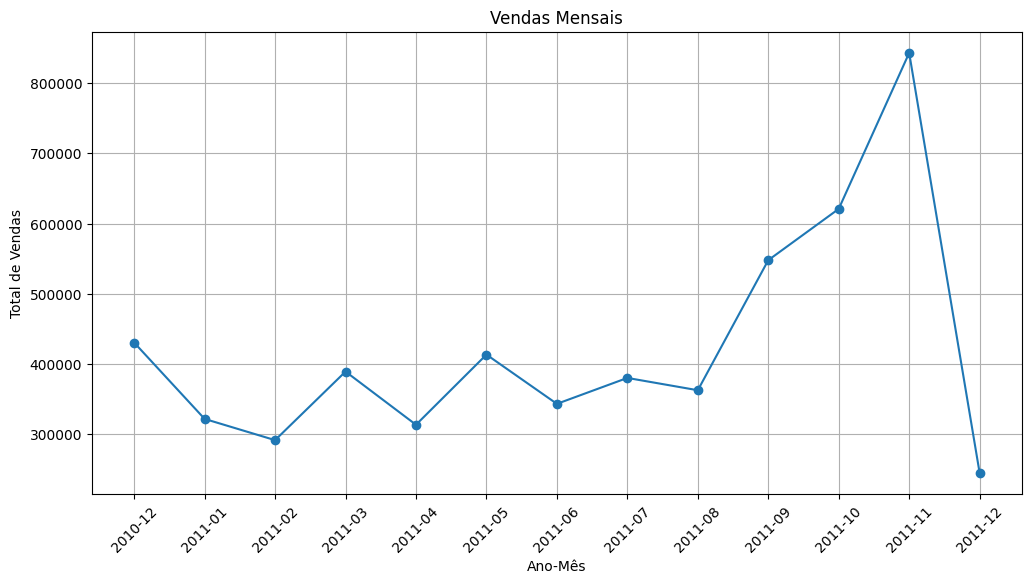

In [224]:
import matplotlib.pyplot as plt

# Agrupa o total de vendas por mês
sales_trend = df_so.groupby("YearMonth")["TotalPrice"].sum()

# Cria gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index.astype(str), sales_trend.values, marker="o", linestyle="-")
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Vendas")
plt.title("Vendas Mensais")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

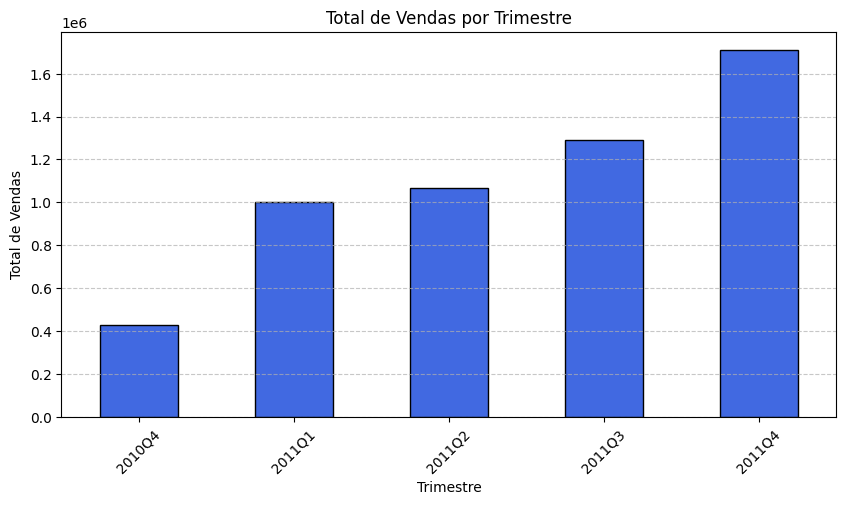

In [225]:
# Cria coluna com o trimestre do ano
df_so["Quarter"] = df_so["InvoiceDate"].dt.to_period("Q")

# Agrupa as vendas por trimestre
sales_by_quarter = df_so.groupby("Quarter")["TotalPrice"].sum()

# Cria gráfico de vendas por trimestre
plt.figure(figsize=(10,5))
sales_by_quarter.plot(kind="bar", color="royalblue", edgecolor="black")
plt.title("Total de Vendas por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [226]:
# Agrupa por trimestre e produto, somando o total vendido
product_growth = df_so.groupby(["Quarter", "Description"])["TotalPrice"].sum().reset_index()

# Ordena para visualizar os produtos mais vendidos em cada trimestre
top_products = product_growth.sort_values(["Quarter", "TotalPrice"], ascending=[True, False])

# Exibe os 3 mais vendidos por trimestre
top_products.groupby("Quarter").head(3)

,Quarter,Description,TotalPrice
779,2010Q4,DOTCOM POSTAGE,24671.19
1994,2010Q4,REGENCY CAKESTAND 3 TIER,9103.00
1872,2010Q4,POSTAGE,4386.00
3493,2011Q1,DOTCOM POSTAGE,35808.81
4812,2011Q1,REGENCY CAKESTAND 3 TIER,26267.27
4677,2011Q1,POSTAGE,13159.83
6410,2011Q2,DOTCOM POSTAGE,29613.34
7799,2011Q2,REGENCY CAKESTAND 3 TIER,24530.96
7463,2011Q2,PARTY BUNTING,15134.95
9467,2011Q3,DOTCOM POSTAGE,41418.92


In [227]:
# Agrupa as vendas por trimestre e país, somando os valores totais
top_countries = df_so.groupby(["Quarter", "Country"])["TotalPrice"].sum().reset_index()

# Para cada trimestre, pega os 3 países com maior faturamento
top_countries = top_countries.sort_values(["Quarter", "TotalPrice"], ascending=[True, False])

# Filtra apenas os 3 maiores países por trimestre
top_countries.groupby("Quarter").head(3)

,Quarter,Country,TotalPrice
21,2010Q4,United Kingdom,393089.050
9,2010Q4,Germany,10211.350
6,2010Q4,EIRE,7083.210
51,2011Q1,United Kingdom,863427.990
33,2011Q1,Germany,27934.420
32,2011Q1,France,26610.620
82,2011Q2,United Kingdom,925963.941
65,2011Q2,Germany,31789.350
61,2011Q2,EIRE,25578.570
111,2011Q3,United Kingdom,1102066.573


In [228]:
from mlxtend.frequent_patterns import apriori, association_rules

# Carrega apenas colunas necessárias e otimizar tipos
use_cols = ["InvoiceNo", "StockCode", "Quantity", "Country"]

# Cria uma cópia separada dos cancelamentos antes de removê-los
df_cancelamentos = df_so[df_so["InvoiceNo"].astype(str).str.startswith("C")]

# Filtra transações válidas
df_so = df_so[df_so["Quantity"] > 0]

# Seleciona apenas um país
df_so = df_so[df_so["Country"] == "United Kingdom"]

# Cria matriz de cestas de compras
basket = df_so.pivot_table(index="InvoiceNo", columns="StockCode", values="Quantity", aggfunc="sum", fill_value=0)

# Converte para valores booleanos para reduzir memória
basket = basket.astype("bool")

# Aplica o algoritmo Apriori
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Gera regras de associação
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Exibe as principais regras
print(rules.sort_values("lift", ascending=False).head(5))

        antecedents     consequents  antecedent support  consequent support  \
190  (22699, 22697)         (22698)            0.037317            0.038020   
195         (22698)  (22699, 22697)            0.038020            0.037317   
191  (22699, 22698)         (22697)            0.028998            0.050615   
194         (22697)  (22699, 22698)            0.050615            0.028998   
192  (22697, 22698)         (22699)            0.030990            0.051025   

      support  confidence       lift  representativity  leverage  conviction  \
190  0.026069    0.698587  18.374241               1.0  0.024650    3.191569   
195  0.026069    0.685670  18.374241               1.0  0.024650    3.062653   
191  0.026069    0.898990  17.761293               1.0  0.024601    9.398910   
194  0.026069    0.515046  17.761293               1.0  0.024601    2.002257   
192  0.026069    0.841210  16.486167               1.0  0.024488    5.976282   

     zhangs_metric   jaccard  certainty  kul

In [229]:
# 🔹 Top 3 produtos mais cancelados
top_produtos = df_cancelamentos.groupby('StockCode')['Quantity'].sum().abs().sort_values(ascending=False).head(3)

# 🔹 Top 3 clientes que mais cancelam
top_clientes = df_cancelamentos.groupby('CustomerID')['Quantity'].sum().abs().sort_values(ascending=False).head(3)

# 🔹 Top 3 países com mais cancelamentos
top_paises = df_cancelamentos.groupby('Country')['Quantity'].sum().abs().sort_values(ascending=False).head(3)

# Exibe resultados
print("🔹 Top 3 produtos mais cancelados:\n", top_produtos)
print("\n🔹 Top 3 clientes que mais cancelam:\n", top_clientes)
print("\n🔹 Top 3 países com mais cancelamentos:\n", top_paises)

🔹 Top 3 produtos mais cancelados:
 StockCode
22423    458
M        306
22960    247
Name: Quantity, dtype: int64

🔹 Top 3 clientes que mais cancelam:
 CustomerID
<NA>     924
14911    773
12607    651
Name: Quantity, dtype: int64

🔹 Top 3 países com mais cancelamentos:
 Country
United Kingdom    20641
Germany            1252
EIRE               1082
Name: Quantity, dtype: int64


In [242]:
import pandas as pd

# 1. Garantir que 'InvoiceDate' está no formato datetime
df_so['InvoiceDate'] = pd.to_datetime(df_so['InvoiceDate'], errors='coerce')

# 2. Criar a coluna 'TotalAmount' (quantidade * preço unitário)
df_so['TotalAmount'] = df_so['Quantity'] * df_so['UnitPrice']

# 3. Calcular a Recency
data_ref = df_so['InvoiceDate'].max()  # Data mais recente
df_so['Recency'] = (data_ref - df_so['InvoiceDate']).dt.days

# 4. Calcular a Frequência (quantidade de compras por cliente)
df_frequencia = df_so.groupby('CustomerID').size().reset_index(name='Frequency')

# 5. Calcular o Valor Monetário (total gasto por cliente)
df_valor = df_so.groupby('CustomerID')['TotalAmount'].sum().reset_index(name='Monetary')

# 6. Calcular a Recency (última compra de cada cliente)
df_recency = df_so.groupby('CustomerID')['Recency'].min().reset_index()

# 7. Unir as métricas (Recency, Frequency, Monetary) em um único DataFrame
df_rfm = df_frequencia.merge(df_valor, on='CustomerID', how='left')
df_rfm = df_rfm.merge(df_recency, on='CustomerID', how='left')

# Verificar o resultado final
print(df_rfm.head())


  CustomerID  Frequency  Monetary  Recency
0      12747         83   2100.69        1
1      12748       4143  22912.81        0
2      12749        188   3856.22        3
3      12820         49    824.14        2
4      12821          5     77.12      213


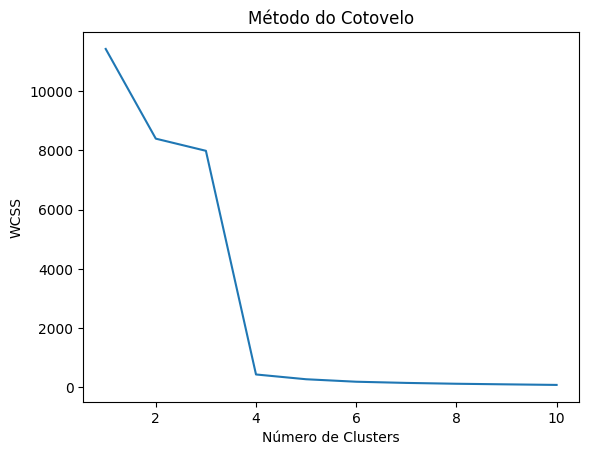

In [244]:
# Determinando o número ideal de clusters com o Método do Cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

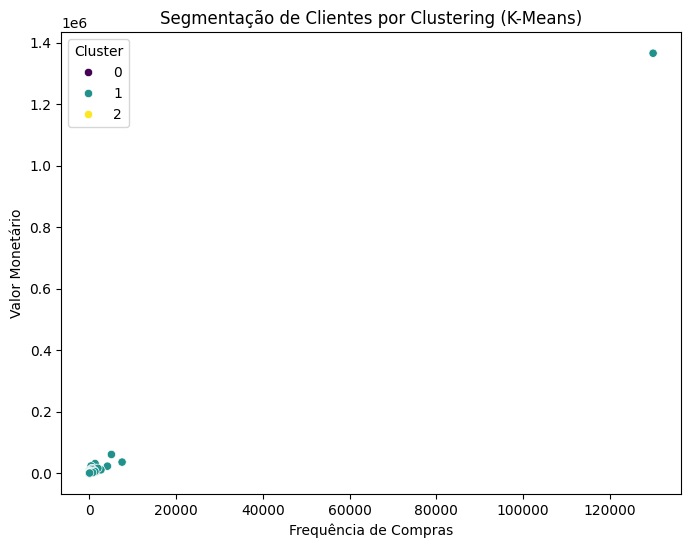

In [251]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Normalizando os dados para que todas as variáveis tenham a mesma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])

# Aplicando o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuste o número de clusters conforme necessário
df_rfm['Cluster'] = kmeans.fit_predict(df_rfm_scaled)

# Visualizando a segmentação
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_rfm['Frequency'], y=df_rfm['Monetary'], hue=df_rfm['Cluster'], palette='viridis')
plt.title('Segmentação de Clientes por Clustering (K-Means)')
plt.xlabel('Frequência de Compras')
plt.ylabel('Valor Monetário')
plt.show()

In [252]:
# Estatísticas por cluster
cluster_analysis = df_rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
})

print(cluster_analysis)

            Recency              Frequency                  Monetary  \
               mean        std        mean          std         mean   
Cluster                                                                
0        294.100189  44.358169   21.901701    27.001224   288.040246   
1         32.208285  25.891075  154.414634  2566.913430  1836.972882   
2        158.734488  37.158253   35.305916    44.385873   469.138732   

                       
                  std  
Cluster                
0          373.961293  
1        26941.036543  
2          493.949639  
